In [ ]:
!pip3 install torch==1.10.2
!pip3 install torchvision==0.13.1
!pip3 install scikit-image

## 0 - Utils for the Neural net handling

## 1 - Feature visualization basics

#### a - The network 

We are going to work on understanding what a VGG16 model learned after being trained on a ImageNet dataset.


First we need to understand the architecture of the model.

![Model architecture](https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16-1024x450.jpg) 

This diagram display the different convolution layers used in the model. 
But it does not mention the relu activation after each convolution.

For example, we will focus on the features learned by the `Conv4_3` layer


#### b - how to visualize a feature 

We have different ways to understand what triggers a specific part of a neural network.

![different feature viz tech](https://www.frontiersin.org/files/Articles/558861/frai-03-00049-HTML/image_m/frai-03-00049-g001.jpg)

In this notebook, we will focus on channel level activation rather than other options.


In [1]:
# 1 - Getting a specific layer in a CNN

import torchvision 
model = torchvision.models.vgg16(pretrained=False)
list(model.children())

/opt/homebrew/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[Sequential(
   (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (1): ReLU(inplace=True)
   (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (3): ReLU(inplace=True)
   (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (6): ReLU(inplace=True)
   (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (8): ReLU(inplace=True)
   (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (11): ReLU(inplace=True)
   (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (13): ReLU(inplace=True)
   (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (15): ReLU(inplace=True)
   (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (17): Conv2d(

In [ ]:
## Impelment here the layer extraction based on a channel index i
## We want to retrieve the Conv4_3 block

def get_vgg16_conv4_3_layer(channel_index):
    """
    in: channel_index
    out: nn.Module 
    
    We expect the following behavior
    in: 3x224x224 image
    out: corresponding conv4_3 channel (1, N, N)
    """
    pass


In [ ]:

def test_my_function(fn):
    img = torch.rand((1, 3, 224, 224))
    channel = fn(img)
    
    if len(channel.shape) == 3:
        assert channel[0, :, :].shape == torch.Size([28, 28])
    else:
        assert channel[:, :].shape == torch.Size([28, 28])
        
    print("All good")

    
fn_ = get_vgg16_conv4_3_layer(33)

# Uncomment the next line to test the function
#test_my_function(fn_) # <------------- HERE

#### Next we want to implement the loss function we have defined 

The goal is to activate the whole channel that we have computed before





In [ ]:
def excitation_loss(channel):
    """
    The loss should be negative
    
    Optimization of channel can be positive or negative
    Example can be seen at : 
    https://distill.pub/2017/feature-visualization/#diversity
    """
    loss = 0 # Compute here the loss
    return loss

In [ ]:

def test_my_function(excitation_loss_fn):
    model_forward = get_vgg16_conv4_3_layer(33)
    img = torch.rand((1, 3, 224, 224))
    channel = model_forward(img)
    
    loss = excitation_loss_fn(channel)
    
    assert len(loss.shape) == 1
    assert loss.shape[0] == 1
    assert loss < 0
    
    print("All good")

    
test_my_function(excitation_loss)

#### Optimization time

Let's force an image to optimize this new loss we have defined.

Next cell, you will find a skeleton of the optimization framework.



In [ ]:
def optimize(inference_fn, excitation_loss_fn, steps=128, lr=0.1):
    
    # We define the image parametrization here
    optimized_img = None
    optimized_img.requires_grad = True
    
    optim = torch.optim.Adam([optimized_img], lr=lr)
    
    for i in range(steps):
        
        optim.zero_grad()
        
        # Can you think a way to make the optimization easier here ?
        scaled_img = optimized_img
        channel_ = inference_fn(scaled_img)
        loss = excitation_loss_fn(channel_)
        
        if i in [0, int(steps / 2), steps - 1]:
            print(f"loss at step {i} : ", loss)
        
        loss.backward()
        optim.step()
        
    return scaled_img
        

In [ ]:
# To complete with your loss and network function

img = optimize(None, None)

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 8))
plt.imshow(img[0].permute(1, 2, 0).cpu().detach().numpy())

loss at step 0 :  tensor(-379.0327, grad_fn=<AddBackward0>)
loss at step 64 :  tensor(-46788.6172, grad_fn=<AddBackward0>)
loss at step 127 :  tensor(-56006.2539, grad_fn=<AddBackward0>)
loss at step 0 :  tensor(-379.0828, grad_fn=<AddBackward0>)
loss at step 64 :  tensor(-19681.7402, grad_fn=<AddBackward0>)
loss at step 127 :  tensor(-32231.9629, grad_fn=<AddBackward0>)
loss at step 0 :  tensor(-379.1026, grad_fn=<AddBackward0>)
loss at step 64 :  tensor(-1315.4812, grad_fn=<AddBackward0>)
loss at step 127 :  tensor(-4319.5557, grad_fn=<AddBackward0>)


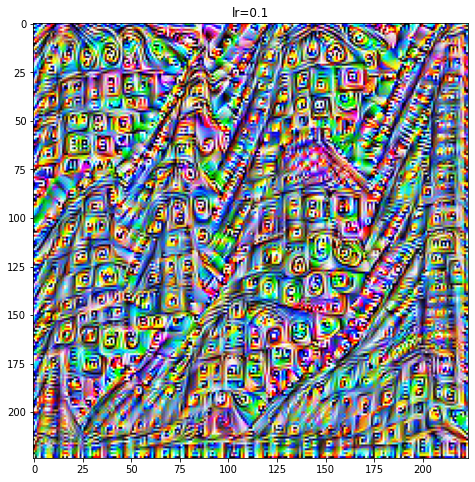

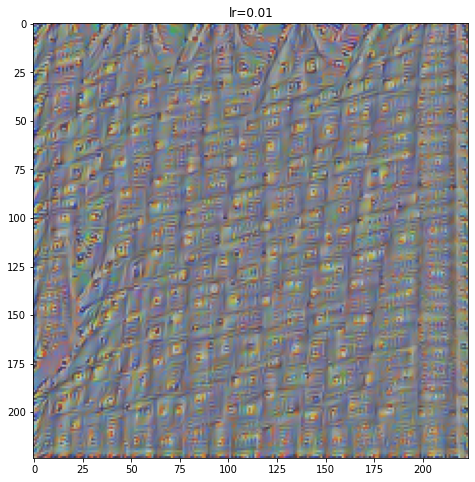

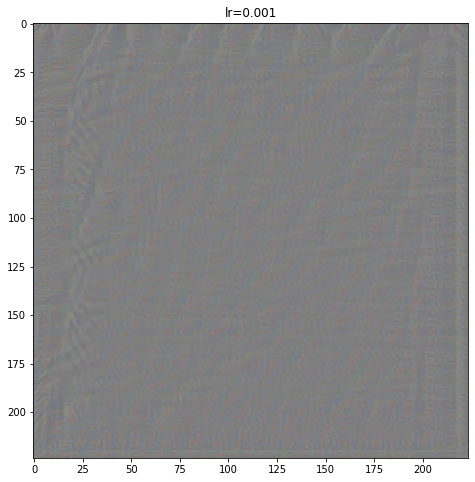

In [13]:


for lr in [0.1, 0.01, 0.001]:
    plt.figure(figsize=(8, 8))
    plt.title(f"lr={lr}")
    # To be filled !!!!
    img = optimize(None, None, lr=lr)
    plt.imshow(img[0].permute(1, 2, 0).cpu().detach().numpy())

Ok, we are reaching our first optimized images !!!



## 2 - Adding high-frequency regularization

We essentially optimized to get a very noisy pattern.

Following the article, we will try to remove the high frequency pattern in the image.

To do so, we can use the **Total Variation** : this regularization penalizes variance between neighboring pixels (total variation)

We will implement it by computing as 
```
tv = ||dI/dx|| + ||dI/dy||
with I being the image
```


In [15]:
from torch import nn


class TVLoss(nn.Module):

    def forward(self, tensor):
        pass
    

In [45]:
import random


def optimize(inference_fn, excitation_loss_fn, steps=128, lr=0.1, lambda_tv=0.1):
    
    optimized_img = 0.001 * torch.randn((1, 3, 224, 224))
    optimized_img.requires_grad = True
    tvloss = TVLoss()
    my_jitter = lambda x: jitter(8, x)
    
    optim = torch.optim.Adam([optimized_img], lr=lr)
    
    for i in range(steps):
        
        optim.zero_grad()
        scaled_img = torch.sigmoid(optimized_img)
        channel_ = inference_fn(scaled_img)
        tv_reg = tvloss(optimized_img)
        exc_loss = excitation_loss_fn(channel_)
        loss = exc_loss + lambda_tv * tv_reg
        #print(exc_loss, tv_reg)
        
        if i in [0, int(steps / 2), steps - 1]:
            print(f"loss at step {i} : ", loss)
        
        loss.backward()
        optim.step()
        
    return scaled_img



loss at step 0 :  tensor(-0.4611, grad_fn=<AddBackward0>)
loss at step 64 :  tensor(-46.8621, grad_fn=<AddBackward0>)
loss at step 127 :  tensor(-53.7600, grad_fn=<AddBackward0>)


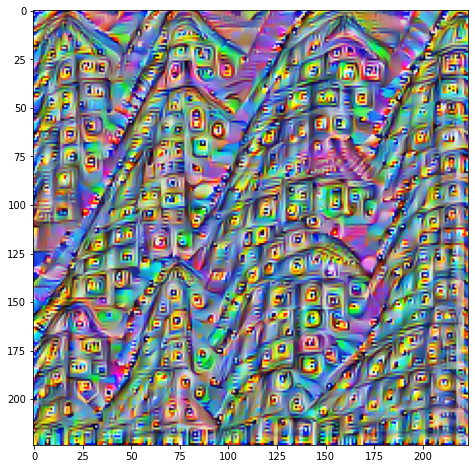

In [46]:
# To be filled
img_tvloss = optimize(None, None, lambda_tv=10.)

plt.figure(figsize=(8, 8))
plt.imshow(img_tvloss[0].permute(1, 2, 0).cpu().detach().numpy())

loss at step 0 :  tensor(-0.2585, grad_fn=<AddBackward0>)
loss at step 64 :  tensor(-12.9596, grad_fn=<AddBackward0>)
loss at step 127 :  tensor(-15.2091, grad_fn=<AddBackward0>)
loss at step 0 :  tensor(-0.4813, grad_fn=<AddBackward0>)
loss at step 64 :  tensor(-59.9980, grad_fn=<AddBackward0>)
loss at step 127 :  tensor(-71.9844, grad_fn=<AddBackward0>)
loss at step 0 :  tensor(-0.4837, grad_fn=<AddBackward0>)
loss at step 64 :  tensor(-61.6703, grad_fn=<AddBackward0>)
loss at step 127 :  tensor(-74.4975, grad_fn=<AddBackward0>)


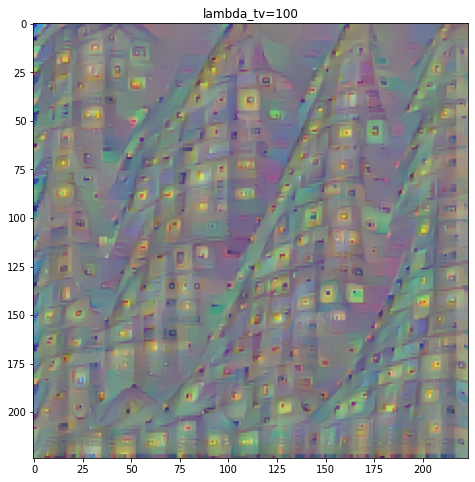

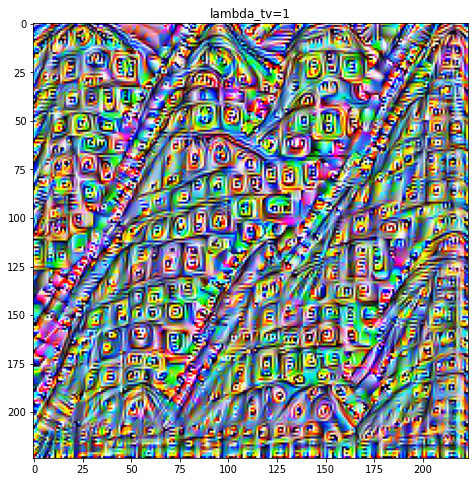

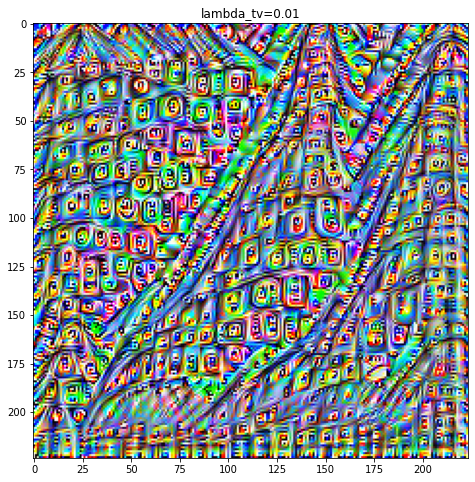

In [19]:
for lambda_tv in [100, 1, 0.01]:
    plt.figure(figsize=(8, 8))
    plt.title(f"lambda_tv={lambda_tv}")
    # To be filled !!!!!!
    img = optimize(None, None, lr=0.1, lambda_tv=lambda_tv)
    plt.imshow(img[0].permute(1, 2, 0).cpu().detach().numpy())

## 3 - Data augmentation as a regularization

We still don't have a very clear image. 
So next implementation will be the "transfomation robustness" part of the article.

We will focus on one specific transformation : **the jitter**

What is it exactly ? 

Instead of having the same image used at every optimization step, we have instead an image translated randomly.

![jitter distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Gaussian_Filter.svg/440px-Gaussian_Filter.svg.png)

We can use any distribution that you like for the random translation.

**Note** : when translating, you will need to pad the border of the image in order to avoid having a smaller image at the end of the process.


In [ ]:
def jitter(tau, img):
    # Implementation to be done !!
    return img


In [21]:


def optimize(inference_fn, excitation_loss_fn, steps=128, lr=0.1, lambda_tv=0.1):
    
    optimized_img = 0.001 * torch.randn((1, 3, 224, 224))
    optimized_img.requires_grad = True
    tvloss = TVLoss()
    my_jitter = lambda x: jitter(8, x)
    
    optim = torch.optim.Adam([optimized_img], lr=lr)
    
    for i in range(steps):
        
        optim.zero_grad()
        
        scaled_img = torch.sigmoid(optimized_img)
        channel_ = inference_fn(my_jitter(scaled_img))
        tv_reg = tvloss(optimized_img)
        exc_loss = excitation_loss_fn(channel_)
        loss = exc_loss + lambda_tv * tv_reg
        
        if i in [0, int(steps / 2), steps - 1]:
            print(f"loss at step {i} : ", loss)
        
        loss.backward()
        optim.step()
        
    return scaled_img

loss at step 0 :  tensor(-0.4612, grad_fn=<AddBackward0>)
loss at step 64 :  tensor(-37.2106, grad_fn=<AddBackward0>)
loss at step 127 :  tensor(-48.3018, grad_fn=<AddBackward0>)


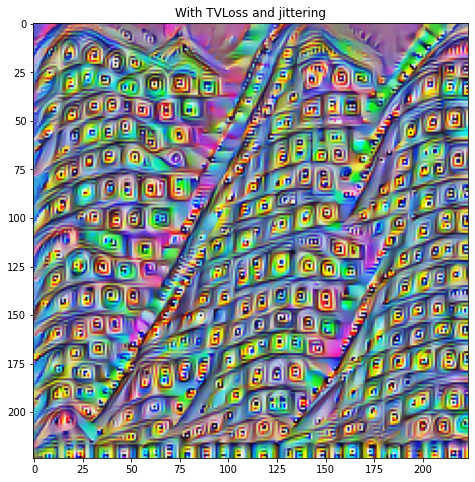

In [22]:
# To be filled !!!!!!!!
img_jitter_tvloss = optimize(None, None, lambda_tv=10.)

plt.figure(figsize=(8, 8))
plt.title("With TVLoss and jittering")
plt.imshow(img_jitter_tvloss[0].permute(1, 2, 0).cpu().detach().numpy())

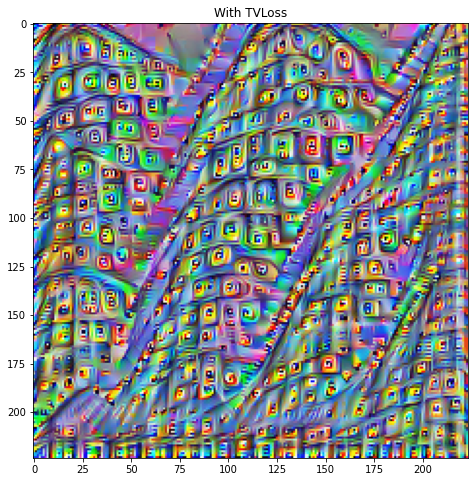

In [23]:
plt.figure(figsize=(8, 8))
plt.title("With TVLoss")
plt.imshow(img_tvloss[0].permute(1, 2, 0).cpu().detach().numpy())

## Conclusion

Jittering brings a much higher power of high frequency removal than the actual high frequency filter


## 4 - Challenging the understanding of neural network features

We have all seen an image similar to this one : 

![is it so ?](https://qph.cf2.quoracdn.net/main-qimg-475b27b1d9e1418dd55646a0c84a5eb2-c)

So if we take a concept learned on ImageNet, we should be able to rebuild a set of images representing the same idea.



In [9]:
from typing import NamedTuple, Any
import torchvision.transforms as transforms
import random

import numpy as np
import torch

if torch.cuda.is_available():
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
else:
    torch.set_default_tensor_type('torch.FloatTensor')


color_correlation_svd_sqrt = np.asarray([[0.26, 0.09, 0.02],
                                         [0.27, 0.00, -0.05],
                                         [0.27, -0.09, 0.03]]).astype("float32")
max_norm_svd_sqrt = np.max(np.linalg.norm(color_correlation_svd_sqrt, axis=0))

color_mean = torch.from_numpy(np.asarray([0.48, 0.46, 0.41])).float()



import torch
import numpy as np
import torchvision
from enum import Enum
import functools
from torch import nn
import torch
from torchvision import models
#from neural_styles.image_utils.data_augmentation import build_subsampler
#from neural_styles.nn_utils.adapted_networks import StyleResNet18
#from neural_styles.nn_utils.relu_override import replace_relu_with_leaky, recursive_relu_replace
#from transformers import AutoFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests
import pickle
from matplotlib import pyplot as plt


def replace_relu_with_leaky(modules, ramp=0.001):
    for i, module in enumerate(modules):
        if type(module).__name__ == nn.ReLU.__name__:
            modules[i] = torch.nn.LeakyReLU(ramp)


            
def build_subsampler(subsample=2):
    mean_pool = torch.nn.AdaptiveAvgPool2d((subsample, subsample))
    return mean_pool


class VGG19Layers(Enum):
    Conv1_2 = 3
    Conv2_2 = 8
    Conv3_3 = 14
    Conv3_4 = 16
    Conv4_3 = 23
    Conv4_4 = 25
    Conv5_1 = 28
    Conv5_2 = 30
    Conv5_3 = 32
    Conv5_4 = 34

    def __repr__(self):
        return str(self)


class VGG16Layers(Enum):
    Conv1_2 = 3
    Conv2_2 = 8
    Conv3_3 = 14
    Conv4_3 = 21
    Conv5_1 = 24
    Conv5_2 = 26
    Conv5_3 = 28
    D3 = -1

    def __repr__(self):
        return str(self)


class ResNet18Layers(Enum):
    Block1 = 5
    Block2 = 6
    Block3 = 7
    Block4 = 8

    def __repr__(self):
        return str(self)


def load_alexnet(layer_index, *args):
    global global_step
    nn_model = models.alexnet(pretrained=True).eval()
    modules = list(nn_model.children())

    print(modules)
    if layer_index == -1:
        return "alexnet_{}".format("classes"), build_subsampler(224), nn_model
    else:
        return "alexnet_{}".format("features"), build_subsampler(224), modules[0]


def load_resnet_18(layer_name, image_size=500):
    resnet = models.resnet18(pretrained=True).eval()
    nn_model = list(resnet.children())
    nn_model = recursive_relu_replace(nn_model)

    max_layer = -1
    if layer_name not in list(ResNet18Layers):
        raise Exception("Invalid layer name")
    else:
        max_layer = layer_name.value

    return "resnet18_{}".format(layer_name), build_subsampler(image_size), \
           nn.Sequential(*nn_model[0: max_layer])


def load_style_resnet_18(layers, image_size=500):
    resnet = StyleResNet18(layers)
    return "StyleResNet18", build_subsampler(image_size), resnet


def load_vgg_16(layer_name, image_size=500, *args):
    vgg = models.vgg16(pretrained=True).eval()
    modules = list(vgg.children())
    replace_relu_with_leaky(modules, ramp=0.1)

    max_layer = -1
    if layer_name not in list(VGG16Layers):
        raise Exception("Invalid layer name")
    else:
        max_layer = layer_name.value
    nn_model = nn.Sequential(vgg.features[0:max_layer])

    if layer_name == VGG16Layers.D3:
        return "vgg16_{}".format("classes"), build_subsampler(image_size), vgg
    else:
        return "vgg16_{}".format(layer_name), build_subsampler(image_size), nn_model


def load_vgg_19(layer_name):
    nn_model = models.vgg19(pretrained=True).eval()
    modules = list(nn_model.children())
    replace_relu_with_leaky(modules, ramp=0.1)

    max_layer = -1
    if layer_name not in list(VGG19Layers):
        raise Exception("Invalid layer name")
    else:
        max_layer = layer_name.value
    nn_model = nn.Sequential(modules[0][0:max_layer])

    return "vgg19", build_subsampler(224), nn_model


def dynamic_model_load(layer_name):
    if layer_name in VGG16Layers:
        name, _, nn_model = load_vgg_16(layer_name)
    elif layer_name in VGG19Layers:
        name, _, nn_model = load_vgg_19(layer_name)
    elif layer_name in ResNet18Layers:
        name, _, nn_model = load_resnet_18(layer_name)
    else:
        raise Exception("Invalid layer name")
    nn_model = nn_model.to(torch.get_default_dtype())
    nn_model.requires_grad = False
    return name, nn_model




def freq_to_rgb(spectrum_var, h, w, ch=3, decay_power=1, decorrelate=True):
    spectrum_var = normalise(spectrum_var, h, w, decay_power)
    img = torch.fft.irfft(spectrum_var, dim=-1)
    rgb_img = img[:, :ch, :h, :w, 0]
    rgb_img = to_valid_rgb(rgb_img, decorrelate=decorrelate)

    return rgb_img


def freq_to_rgba(spectrum_var, h, w, ch=4, decay_power=1, decorrelate=True):

    rgb_spec = spectrum_var[:, :, :3, :, :]
    print(rgb_spec.shape)
    pre_img = normalise(rgb_spec, h, w, decay_power)
    img = torch.fft.irfft(pre_img, 3)

    rgb_img = img[:, :3, :h, :w]
    rgb_img = to_valid_rgb(rgb_img, decorrelate=decorrelate)

    pre_mask = spectrum_var[:, :, 3:, :, :]
    mask_var = normalise(pre_mask, h, w, decay_power)
    mask =  to_valid_rgb(torch.fft.irfft(mask_var, 3), decorrelate=False)[:, :, :h, :w]

    final = torch.cat([rgb_img, mask], dim=1)

    return final


def normalise(spectrum_var, h, w, decay_power):
    freqs = _rfft2d_freqs(h, w)
    spectrum_scale = 1.0 / np.maximum(freqs, 1.0 / max(h, w)) ** decay_power
    spectrum_scale *= np.sqrt(w * h)
    spectrum_var = spectrum_var * torch.Tensor(spectrum_scale)
    spectrum_var = spectrum_var.permute(0, 2, 3, 4, 1)
    return spectrum_var


def _linear_decorelate_color(t):
    """Multiply input by sqrt of emperical (ImageNet) color correlation matrix.

    If you interpret t's innermost dimension as describing colors in a
    decorrelated version of the color space (which is a very natural way to
    describe colors -- see discussion in Feature Visualization article) the way
    to map back to normal colors is multiply the square root of your color
    correlations.
    """
    # check that inner dimension is 3?
    t_flat = t.permute(0, 2, 3, 1)
    color_correlation_normalized = color_correlation_svd_sqrt / max_norm_svd_sqrt
    t_flat = torch.matmul(t_flat, torch.Tensor(color_correlation_normalized.T))
    tt = t_flat.permute(0, 3, 1, 2)
    return tt


def to_valid_rgb(t, decorrelate=True, sigmoid=True):
    """Transform inner dimension of t to valid rgb colors.

    In practice this consistes of two parts:
    (1) If requested, transform the colors from a decorrelated color space to RGB.
    (2) Constrain the color channels to be in [0,1], either using a sigmoid
      function or clipping.

    Args:
    t: input tensor, innermost dimension will be interpreted as colors
      and transformed/constrained.
    decorrelate: should the input tensor's colors be interpreted as coming from
      a whitened space or not?
    sigmoid: should the colors be constrained using sigmoid (if True) or
      clipping (if False).

    Returns:
    t with the innermost dimension transformed.
    """
    if decorrelate:
        t = _linear_decorelate_color(t)
    if decorrelate and not sigmoid:
        for i in range(3):
            t[i, :, :] += color_mean[i].cuda()
    if sigmoid:
        return torch.sigmoid(t)
    else:
        return (2 * t - 1) / 2 + 0.5


def _rfft2d_freqs(h, w):
    """Compute 2d spectrum frequences."""
    fy = np.fft.fftfreq(h)[:, None]
    # when we have an odd input dimension we need to keep one additional
    # frequency and later cut off 1 pixel
    if w % 2 == 1:
        fx = np.fft.fftfreq(w)[:w + 1 + w % 2]
    else:
        fx = np.fft.fftfreq(w)[:w + 1]
    return np.sqrt(fx*fx + fy*fy)


def build_freq_img(h, w, ch=3, b=1, sd=0.01, torch_var=True):
    freqs = _rfft2d_freqs(h, w)
    fh, fw = freqs.shape
    sd = sd or 0.001
    init_val = sd * np.random.randn(b, 2, ch, fh, fw).astype("float32")

    if torch_var:
        spectrum_var = torch.autograd.Variable(torch.tensor(init_val, requires_grad=True))
    else:
        spectrum_var = torch.tensor(init_val)

    return spectrum_var



def image_cppn(
    num_output_channels=3,
    num_hidden_channels=64,
    num_layers=0,
    normalize=False):

    layers = [torch.nn.Conv2d(2, num_hidden_channels, 3, padding=1), torch.nn.LeakyReLU()]
    
    for i in range(num_layers):
        layers.append(torch.nn.Conv2d(num_hidden_channels, num_hidden_channels, 3, padding=1))
        layers.append(torch.nn.LeakyReLU())
        layers.append(torch.nn.BatchNorm2d(num_hidden_channels))
        
    layers.append(torch.nn.Conv2d(num_hidden_channels, num_output_channels, 3, padding=1))
    layers.append(torch.nn.Sigmoid())

    network = torch.nn.Sequential(*layers)
    return network



def compose(*functions):
    return functools.reduce(lambda f, g: lambda x: f(g(x)), functions, lambda x: x)




class NetworkImageGenerator():
    
    def __init__(self, n_layers: int, size: int = 224, num_hidden_channels=64):
        self.generator = image_cppn(num_layers=n_layers, num_hidden_channels=num_hidden_channels)
        self.size = size
        self.n_layers = n_layers
        
    def parameters(self):
        return self.generator.parameters()
        
    def generate(self):
        return self.generator(get_grid_input(self.size))
    
    @property
    def name(self):
        return f"CPPN_n={self.n_layers}_s={self.size}"
        

class BasicGenerator():
    
    def __init__(self, size: int = 224, sd=0.1):
        self.image = sd * torch.Tensor(np.random.randn(1, 3, size, size))
        self.image.requires_grad = True
        self.size = size
        
    def parameters(self):
        return [self.image]
        
    def generate(self):
        return torch.sigmoid(self.image)
    
    @property
    def name(self):
        return f"basic_image_{self.size}"
    
    
class FourierGenerator():
    
    def __init__(self, size: int = 224, sd=0.01):
        self.image = build_freq_img(size, size, sd=sd)
        self.image.requires_grad = True
        self.size = size
        
    def parameters(self):
        return [self.image]
        
    def generate(self):
        return freq_to_rgb(self.image[:, :, :3, :, :], self.size, self.size)
    
    @property
    def name(self):
        return f"freq_image_{self.size}"

    
def jitter(tau, img):
    B, C, H, W = img.shape
    tau_x = random.randint(tau, 2 * tau)
    tau_y = random.randint(tau, 2 * tau)
    padded = torch.nn.ReflectionPad2d(tau + 1)(img)
    return padded[:, :, tau_x:tau_x + H, tau_y: tau_y + W]


class ChannelObjective(NamedTuple):
    layer_name: VGG16Layers = VGG16Layers.Conv4_3
    layer_index: int = 0
           
    def build_fn(self):
        name, loss_nn = dynamic_model_load(self.layer_name)
        
        def fn(jittered_batch):
            out = loss_nn(jittered_batch)
            if len(out.shape) == 4:
                return out[:, self.layer_index, :, :]
            else:
                return out[:, self.layer_index]
        
        return fn
    

class NeuronObjective(NamedTuple):
    layer_name: VGG16Layers = VGG16Layers.Conv4_3
    layer_index: int = 0
    x: int = 12
    y: int = 12
           
    def build_fn(self):
        name, loss_nn = dynamic_model_load(self.layer_name)
        
        def fn(jittered_batch):
            return loss_nn(jittered_batch)[:, self.layer_index, self.x, self.y]
        
        return fn
        
        
class NeuronVisualizer(NamedTuple):
    
    generator: Any
    objective: Any
    n_steps: int = 1000
    lr: float = 0.001 


    def gen(self, folder="./", multiplier=1.):

        if torch.cuda.is_available():
            torch.set_default_tensor_type('torch.cuda.FloatTensor')
        else:
            torch.set_default_tensor_type('torch.FloatTensor')
            
        obj_fn = self.objective.build_fn()

        optim = torch.optim.Adam(self.generator.parameters(), lr=self.lr)
        tfs = [lambda x: jitter(8, x), transforms.RandomPerspective(fill=0, p=1, distortion_scale=0.5),]
        tf_pipeline = compose(*tfs)
        repeat = 4


        for i in range(self.n_steps):
            out = self.generator.generate()

            jitters = [tf_pipeline(out[0].unsqueeze(0))
                       for _ in range(repeat)]
            jittered_batch = torch.cat(
                            jitters,
                            dim=0
                        )

            layer = obj_fn(jittered_batch)


            loss = -torch.sum(layer)

            if i % int(self.n_steps / 10) == 0:
                print(loss)

            optim.zero_grad()
            loss.backward()
            optim.step()

        pickle.dump(self.generator, open(f"{folder}/gen={self.generator.name}_model_ln={self.objective.layer_name}_li={self.objective.layer_index}.pkl", "wb"))
        torchvision.utils.save_image(out, f"{folder}/gen={self.generator.name}_ln={self.objective.layer_name}_li={self.objective.layer_index}.jpg")

        return self.generator, out


from IPython.core.display import display, HTML
toggle_code_str = '''
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Sloution"></form>
'''

toggle_code_prepare_str = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>

'''

display(HTML(toggle_code_prepare_str + toggle_code_str))

def toggle_code():
    display(HTML(toggle_code_str))

/var/folders/t7/3vdfctv901x8lg862_72l3540000gn/T/ipykernel_27720/390717736.py:457: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### A - Using a factored version of the code

In [10]:
generator = FourierGenerator(224, sd=0.0001)
objective = ChannelObjective()
optimizer = NeuronVisualizer(generator, objective=objective, lr=0.0003, n_steps=256)

In [11]:
generator, img = optimizer.gen()

tensor(-590.0223, grad_fn=<NegBackward0>)
tensor(-49318.2344, grad_fn=<NegBackward0>)
tensor(-83945.3203, grad_fn=<NegBackward0>)
tensor(-105399.2031, grad_fn=<NegBackward0>)
tensor(-103828., grad_fn=<NegBackward0>)
tensor(-113498.4531, grad_fn=<NegBackward0>)
tensor(-125600.6250, grad_fn=<NegBackward0>)
tensor(-121744.5781, grad_fn=<NegBackward0>)
tensor(-115408.0938, grad_fn=<NegBackward0>)
tensor(-135290.4688, grad_fn=<NegBackward0>)
tensor(-126044.6172, grad_fn=<NegBackward0>)


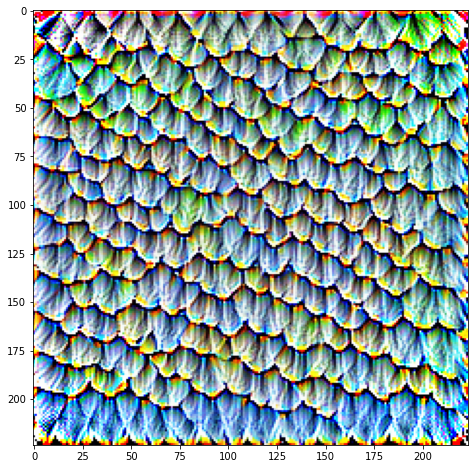

In [12]:
plt.figure(figsize=(8, 8))
plt.imshow(generator.generate()[0].permute(1, 2, 0).cpu().detach().numpy())

In [29]:
generator = FourierGenerator(224, sd=0.0001)
objective = NeuronObjective()
optimizer = NeuronVisualizer(generator, objective=objective, lr=0.0003, n_steps=256)

In [30]:
generator, img = optimizer.gen()

tensor(-0., grad_fn=<NegBackward0>)
tensor(-0., grad_fn=<NegBackward0>)
tensor(-0., grad_fn=<NegBackward0>)
tensor(-0., grad_fn=<NegBackward0>)
tensor(-0., grad_fn=<NegBackward0>)
tensor(-0., grad_fn=<NegBackward0>)
tensor(-0., grad_fn=<NegBackward0>)
tensor(-179.3352, grad_fn=<NegBackward0>)
tensor(-286.7017, grad_fn=<NegBackward0>)
tensor(-310.2976, grad_fn=<NegBackward0>)
tensor(-304.6938, grad_fn=<NegBackward0>)


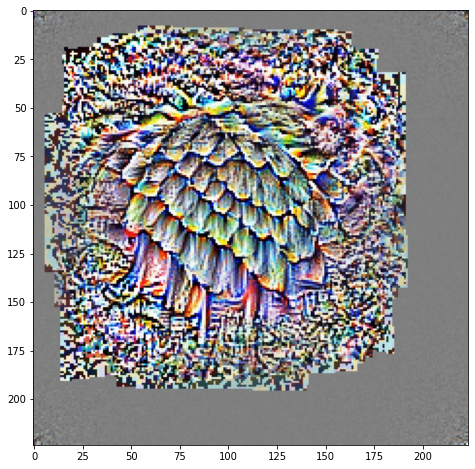

In [31]:
plt.figure(figsize=(8, 8))
plt.imshow(generator.generate()[0].permute(1, 2, 0).cpu().detach().numpy())

### B - Working on a specific concept of ImageNet

Let's use a class known to ImageNet : Pizza

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Pizza_Margherita_stu_spivack.jpg/280px-Pizza_Margherita_stu_spivack.jpg)

### Let's find the most active feature for this image

In [13]:
import urllib, os


img_path = "local-filename.jpg"
link = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Pizza_Margherita_stu_spivack.jpg/280px-Pizza_Margherita_stu_spivack.jpg"
urllib.request.urlretrieve(link, img_path)

('local-filename.jpg', <http.client.HTTPMessage at 0x158101ea0>)

In [14]:
from skimage import io, transform

ref_image = io.imread(img_path)
print(ref_image.shape)



(186, 280, 3)


In [15]:

def compute_channel_wise_contribution(img: np.array, layer_name: VGG16Layers):
    scaled_img = transform.resize(img, (224, 224, 3))
    name, model = dynamic_model_load(layer_name)
    in_ = torch.Tensor(scaled_img).permute(2, 0, 1).unsqueeze(0)
    channels = model(in_)
    if layer_name == VGG16Layers.D3:
        channel_wise_contribution = channels[0, :]
    else:
        channel_wise_contribution = torch.sum(torch.sum(channels[0], axis=-1), axis=-1)
    channel_wise_contribution = channel_wise_contribution.detach().cpu().numpy()
    plt.plot(list(range(channel_wise_contribution.shape[0])), channel_wise_contribution)
    plt.title(f"Layer : {str(layer_name)}")
    return channel_wise_contribution


/opt/homebrew/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


array([934, 930, 963, 964, 965])

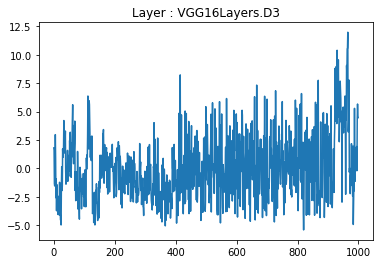

In [16]:

rez = compute_channel_wise_contribution(ref_image, VGG16Layers.D3)

l = np.argsort(rez)

l[-5:] # the model is lost between potpie, burrito and pizza (963)

tensor(3.2676, grad_fn=<NegBackward0>)
tensor(-485.0702, grad_fn=<NegBackward0>)
tensor(-692.9902, grad_fn=<NegBackward0>)
tensor(-789.3570, grad_fn=<NegBackward0>)
tensor(-982.1732, grad_fn=<NegBackward0>)
tensor(-974.1737, grad_fn=<NegBackward0>)
tensor(-929.2814, grad_fn=<NegBackward0>)
tensor(-1069.7942, grad_fn=<NegBackward0>)
tensor(-1075.4644, grad_fn=<NegBackward0>)
tensor(-987.7720, grad_fn=<NegBackward0>)
tensor(-997.0457, grad_fn=<NegBackward0>)


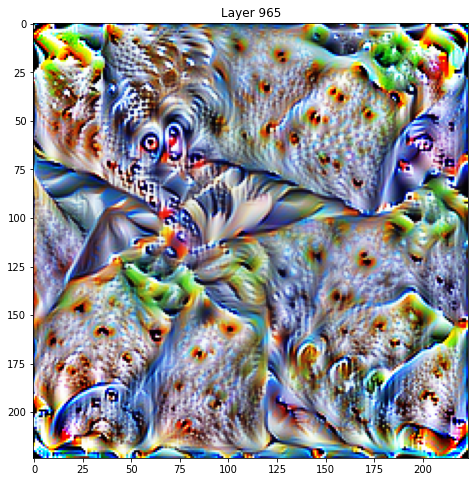

In [18]:
for i, index in enumerate(reversed([934, 930, 963, 964, 965])):
    
    generator = FourierGenerator(224, sd=0.0001)
    objective = ChannelObjective(layer_name=VGG16Layers.D3, layer_index=index)
    optimizer = NeuronVisualizer(generator, objective=objective, lr=0.0001, n_steps=512)
    generator, img = optimizer.gen()
    plt.figure(figsize=(8, 8))
    plt.title(f"Layer {index}")
    plt.imshow(generator.generate()[0].permute(1, 2, 0).cpu().detach().numpy())
    break

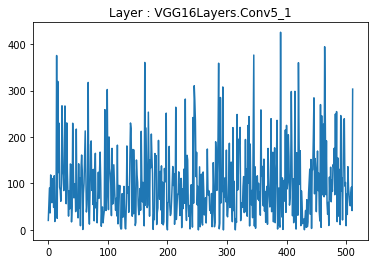

In [41]:
# Let's have a look for a lower layer 
channel_wise_contribution = compute_channel_wise_contribution(ref_image, VGG16Layers.Conv5_1)

In [ ]:
l = torch.argsort(channel_wise_contribution)

l[-5:]

tensor(-35.9291, grad_fn=<NegBackward0>)
tensor(-12734.8496, grad_fn=<NegBackward0>)
tensor(-20498.4883, grad_fn=<NegBackward0>)
tensor(-25293.9512, grad_fn=<NegBackward0>)
tensor(-27115.7656, grad_fn=<NegBackward0>)
tensor(-26809.0645, grad_fn=<NegBackward0>)
tensor(-26788.2461, grad_fn=<NegBackward0>)
tensor(-30023.0039, grad_fn=<NegBackward0>)
tensor(-32357.1797, grad_fn=<NegBackward0>)
tensor(-28244.8145, grad_fn=<NegBackward0>)
tensor(-32417.9980, grad_fn=<NegBackward0>)
tensor(-0., grad_fn=<NegBackward0>)
tensor(-5399.4136, grad_fn=<NegBackward0>)
tensor(-16871.7422, grad_fn=<NegBackward0>)
tensor(-18665.3789, grad_fn=<NegBackward0>)
tensor(-21307.9199, grad_fn=<NegBackward0>)
tensor(-22971.7305, grad_fn=<NegBackward0>)
tensor(-20801.0020, grad_fn=<NegBackward0>)
tensor(-22946.5156, grad_fn=<NegBackward0>)
tensor(-21396.2051, grad_fn=<NegBackward0>)
tensor(-27580.3320, grad_fn=<NegBackward0>)
tensor(-30405.9668, grad_fn=<NegBackward0>)
tensor(-88.5540, grad_fn=<NegBackward0>)
ten

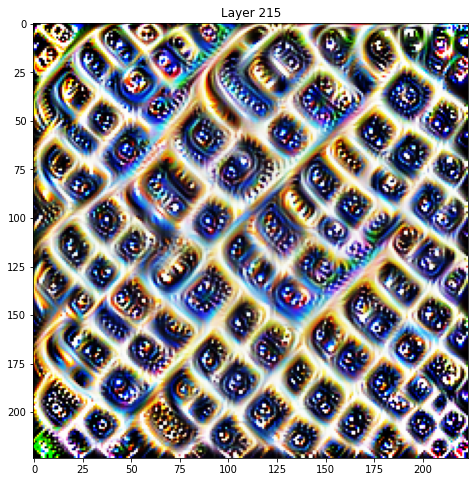

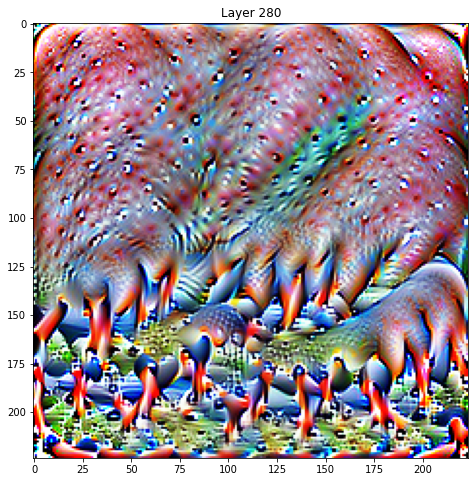

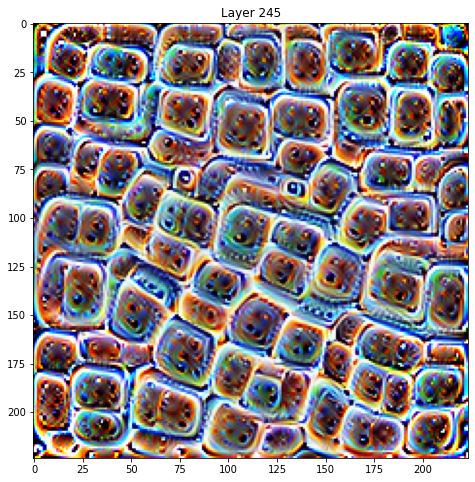

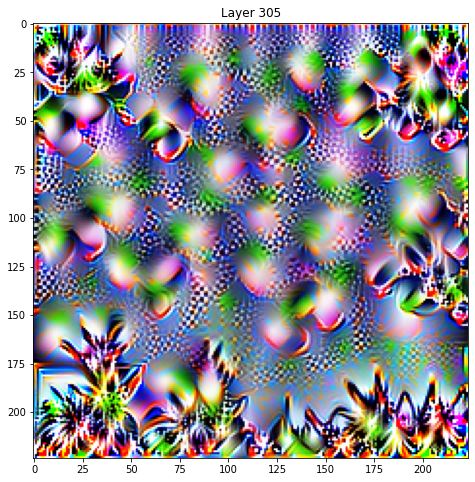

In [43]:
for i, index in enumerate(reversed([162, 14, 345, 464, 390])):
    
    generator = FourierGenerator(224, sd=0.0001)
    objective = ChannelObjective(layer_name=VGG16Layers.Conv5_1, layer_index=index)
    optimizer = NeuronVisualizer(generator, objective=objective, lr=0.0003, n_steps=128)
    generator, img = optimizer.gen()
    plt.figure(figsize=(8, 8))
    plt.title(f"Layer {index}")
    plt.imshow(generator.generate()[0].permute(1, 2, 0).cpu().detach().numpy())

## Conclusion 

We are far away from the idea : one neuron / layer = one concept
    
Even further from ONE unique understandable concept per layer.



## Bonus steps

If times permits, one can try one of these advanced problematics : 

- Update the code to generate 2048 * 2048 images

- Create a new objective class to implement [neural style transfer](https://www.tensorflow.org/tutorials/generative/style_transfer) (image quality around this topic is pretty similar to feature visualization)

- Rather than optimizing for a single channel, define an objective function for linear combination of channels. 
    
    
More details in the next cells

#### a) Larger images

We would like to be able to zoom on the feature image generated by our process.

In order to achieve that, you will need to add a new step on in the image transformation pipeline.

You can try to just increase the size of the image with `FourierGenerator(448, sd=0.0001)` to double the size.
However this will not increase the size of the pattern generated.

Look at the standard transformations in [the pytorch doc](https://pytorch.org/vision/stable/transforms.html) and guess the right one to use.

A final image could look like this one : 
    
![example](https://pbs.twimg.com/media/FcpBoIpWIAIFoMx?format=jpg&name=large)


## b) Create a new objective class to implement neural style transfer 


In this [distill article](https://distill.pub/2018/differentiable-parameterizations/), similar technics are used to have a cleaner image generation process.

Our code can be adapted by changing the objective function and keeping the optimization logic and image augmentation process.

**TODO** : implement the new loss function given a content image (a photo) and a style image (a painting).

**Hint** : The name of the loss is gram matrix



## c) Optimize for a random direction 

We focused on using only one channel in a given layer when optimizing.
We could instead go for a linear combination.

**TODO** : 
- Implement the linear combination loss
- Is it more interpretable ? 
- An input image in the network will give you a direction. Using this same direction, does the optimized image make more sense that separate layers ?